<a href="https://colab.research.google.com/github/gergati/spotify_upso/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Grupo     - Dana Fernández, Boris De Prada, Nicolás Gatica

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
ruta_acceso = '/content/drive/MyDrive/Canciones_Spotify.csv'

canciones = pd.read_csv(ruta_acceso)

canciones.tail(3)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.107,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.133,150.011,4.0,0.623,0,First Contact,Twin Moons
2016,2016,0.00281,0.446,204520,0.915,0.000039,9,0.2180,-6.221,1,0.141,190.013,4.0,0.402,0,I Wanna Get Better,Bleachers


In [ ]:
#df_seleccionado = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness', 'valence']
#df_seleccionado = canciones[df_seleccionado]

##Definimos estás características como las más relevantes para entrenar los modelos, ya que las otras no son tan importates y podrían interferir haciendo ruido para la predicción.


In [7]:
X = canciones[['acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness', 'valence']].to_numpy() #X mayusc por convencion
y = canciones['target'].to_numpy()


In [8]:
X

array([[1.02e-02, 8.33e-01, 4.34e-01, 2.19e-02, 4.31e-01, 2.86e-01],
       [1.99e-01, 7.43e-01, 3.59e-01, 6.11e-03, 7.94e-02, 5.88e-01],
       [3.44e-02, 8.38e-01, 4.12e-01, 2.34e-04, 2.89e-01, 1.73e-01],
       ...,
       [8.57e-03, 6.37e-01, 9.35e-01, 3.99e-03, 1.07e-01, 4.70e-01],
       [1.64e-03, 5.57e-01, 9.92e-01, 6.77e-01, 1.33e-01, 6.23e-01],
       [2.81e-03, 4.46e-01, 9.15e-01, 3.87e-05, 1.41e-01, 4.02e-01]])

In [10]:
from sklearn.preprocessing import StandardScaler

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta y transforma tus datos utilizando el scaler
X= scaler.fit_transform(X)
X

array([[-0.68246675,  1.33287384, -1.17770008, -0.40786448,  3.76308393,
        -0.8530387 ],
       [ 0.04389718,  0.77382959, -1.53446769, -0.4656833 , -0.14752949,
         0.36896951],
       [-0.5893629 ,  1.36393186, -1.28235191, -0.48719967,  2.18371218,
        -1.31028018],
       ...,
       [-0.68873779,  0.11539969,  1.20550755, -0.47344619,  0.15944699,
        -0.1085039 ],
       [-0.71539935, -0.38152853,  1.47665094,  1.99093925,  0.44862773,
         0.51059297],
       [-0.71089805, -1.07101644,  1.11036953, -0.48791481,  0.53760642,
        -0.38365806]])

###Visualizamos como es la relación entre diferentes características(fuimos probando), para ver como se separaban según el target.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be plac

<Axes: xlabel='danceability', ylabel='energy'>

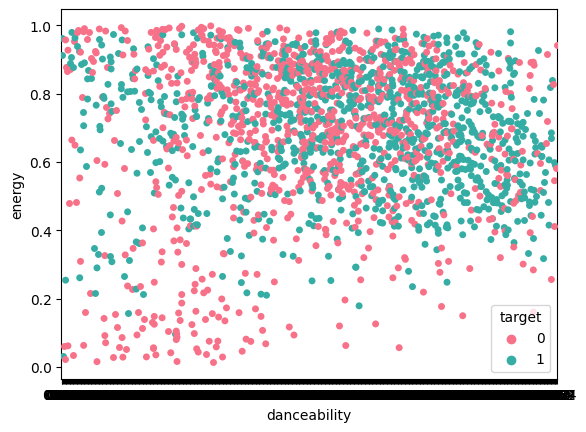

In [11]:
#visualizacion datos
#aca hay que ir probando con las caracteristicas
sns.swarmplot(x="danceability", y="energy", hue="target", data = canciones, palette="husl")

###Separación de los datos en Entrenamiento y Prueba.
Elegimos un test size del 30% de los datos.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##KNN (K-Nearest Neighbors)


In [13]:
def generate_clf_KNN(k, X_train, y_train):
    clasificadorKNN = KNeighborsClassifier(n_neighbors=k)
    clasificadorKNN.fit(X_train, y_train.ravel())
    return clasificadorKNN #retorna el clasificador ya entrenado

In [14]:

def plot_knn_metrics(X, y, clf_KNN, metric='accuracy', k_range=range(1, 10), test_size=0.2, average='macro'):

    metrics_functions = {
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'f1': f1_score
    }

    if metric not in metrics_functions:
        raise ValueError(f"Métrica '{metric}' no reconocida. Elige entre: {', '.join(metrics_functions.keys())}.")

    if metric in ['precision', 'recall', 'f1']:
        metric_function = lambda y_true, y_pred: metrics_functions[metric](y_true, y_pred, average=average)
    else:
        metric_function = metrics_functions[metric]



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    train_scores = []
    test_scores = []


#voy modificando el k dnetro del k range
    for k in k_range:
        knn = clf_KNN(n_neighbors=k)
        knn.fit(X_train, y_train.ravel())

        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)

        train_scores.append(metric_function(y_train, y_train_pred))  #me va a quedar un arreglo con los diferentes accuracys para los != valores de k
        test_scores.append(metric_function(y_test, y_test_pred))

    plt.figure(figsize=(6, 4))
    plt.plot(k_range, train_scores, label=f'Training {metric.capitalize()}')
    plt.plot(k_range, test_scores, label=f'Testing {metric.capitalize()}')

    plt.legend()
    plt.title(f'{metric.capitalize()} vs. Número de Vecinos')
    plt.xlabel('Número de Vecinos (k)')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.xticks(k_range)
    plt.tight_layout()
    plt.show()


###Acá voy probando distintas métricas, cambiando el tamaño de los datos de test, para encontar el k óptimo.
Ek k varía de un rango de 1  a 10. Aunque podría pasarle otro rango en los parámetros.


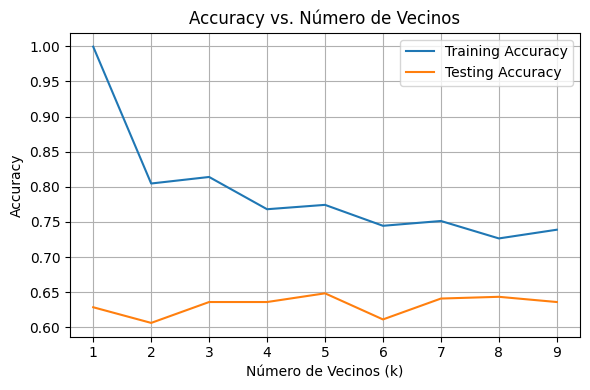

In [15]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'accuracy', test_size=0.2)

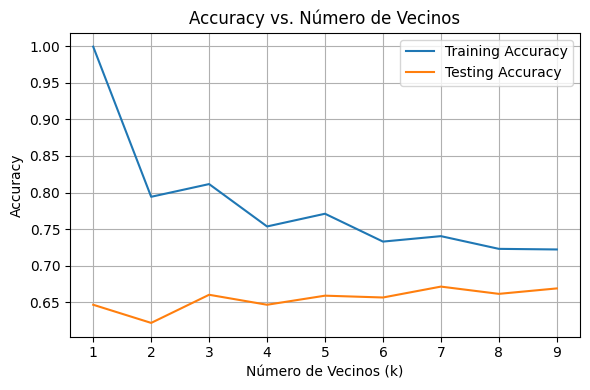

In [16]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'accuracy',test_size=0.4)

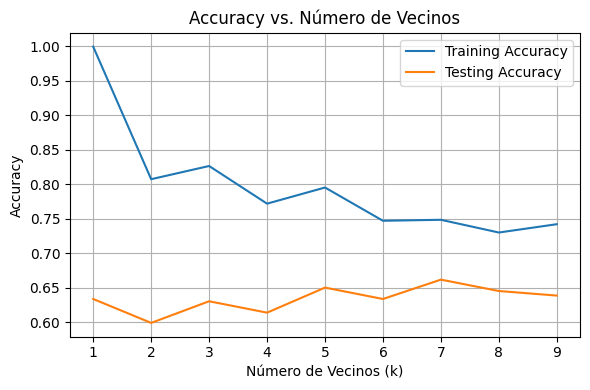

In [17]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'accuracy',test_size=0.3)

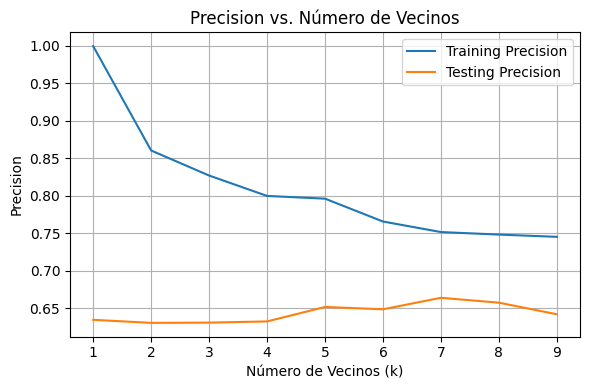

In [18]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'precision',test_size=0.3)

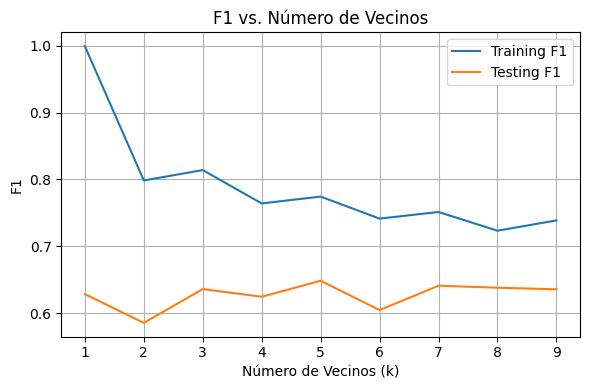

In [19]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'f1',test_size=0.2)

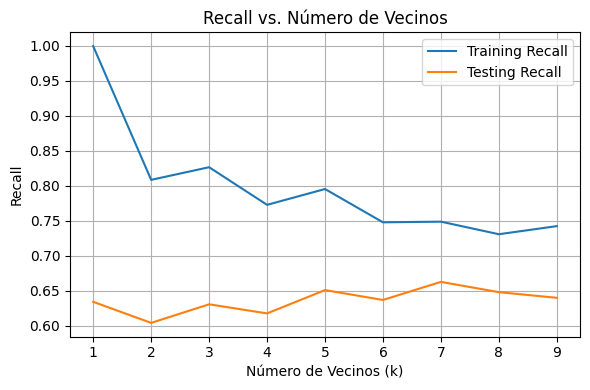

In [20]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'recall',test_size=0.3)

###El k óptimo esta en el rango de (6-8), despues de comparar las diferentes métricas, y tamaños de prueba, nos parecío que el k = 7 era el mejor.

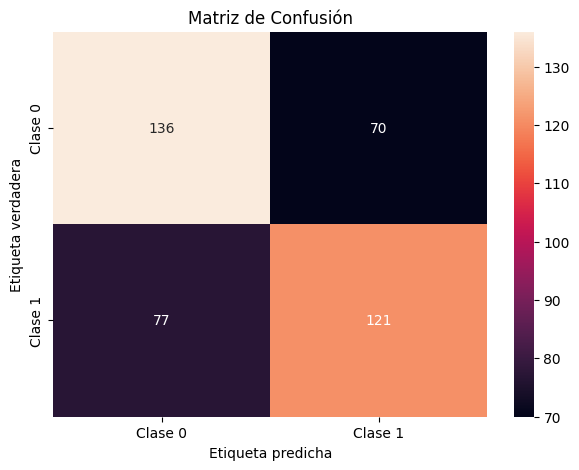

Accuracy: 0.6361386138613861
Precision (macro): 0.6360027529926504
Recall (macro): 0.6356526429341964
F1 Score (macro): 0.6356363234779835


In [21]:

clasificadorKNN = generate_clf_KNN(9,X_train, y_train)

y_pred = clasificadorKNN.predict(X_test) #los targets predichos con los datos de test

#Matriz de confusion
c = confusion_matrix(y_test, y_pred) #les paso los reales, y los predichos


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro')}")
print(f"F1 Score (macro): {f1_score(y_test, y_pred, average='macro')}")

###Validaciones :
Validación Simple
Validación Cruzada k-fold


In [22]:

knn = KNeighborsClassifier(n_neighbors=7)  #k optimo que uno cree


scores = cross_val_score(knn, X, y.ravel(), cv=10) #cv serian las separaciones


print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.65841584 0.5990099  0.74257426 0.65346535 0.51485149 0.69306931
 0.62871287 0.62686567 0.70646766 0.60199005]
Media de los scores: 0.6425422392985567
Desviación estándar de los scores: 0.06107259107620764


In [23]:

cv = KFold(n_splits=5, shuffle=True, random_state=48)

scores = cross_val_score(knn, X, y.ravel(), cv=cv)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.69306931 0.65346535 0.65756824 0.63027295 0.64516129]
Media de los scores: 0.6559074269709849
Desviación estándar de los scores: 0.02079583174158397


###Ajuste Hiperparámetros

In [24]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Define el rango de valores de hiperparámetros que deseas ajustar
parameters = {
    'n_neighbors': [1,2,3, 4, 5,6,  7,8, 9]
}

# Crea el modelo KNN
knn = KNeighborsClassifier()

# Aplica Grid Search para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(knn, parameters, cv=10)
grid_search.fit(X_train, y_train)

# Imprime la mejor combinación de hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Entrena el modelo con la mejor combinación de hiperparámetros
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)


Mejores hiperparámetros encontrados: {'n_neighbors': 9}


KNeighborsClassifier(n_neighbors=9)

In [25]:
# Define la distribución de valores de hiperparámetros que deseas ajustar
parameters = {
    'n_neighbors': [3, 5, 7, 9]
}

# Crea el modelo KNN
knn = KNeighborsClassifier()

# Aplica Random Search para encontrar una buena combinación de hiperparámetros
random_search = RandomizedSearchCV(knn, param_distributions=parameters, n_iter=10, cv=10, random_state=42)
random_search.fit(X_train, y_train)

# Imprime la mejor combinación de hiperparámetros
print("Mejores hiperparámetros encontrados:", random_search.best_params_)

# Entrena el modelo con la mejor combinación de hiperparámetros
best_knn = random_search.best_estimator_
best_knn.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores hiperparámetros encontrados: {'n_neighbors': 9}


KNeighborsClassifier(n_neighbors=9)

#Arbol de decisión

###Aca el tamaño de la prueba es mayor, porque fui probando varios y mejora bastante el modelo

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [27]:

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
#
decision_tree_pred= decision_tree.predict(X_test)

###Matriz de Confusión

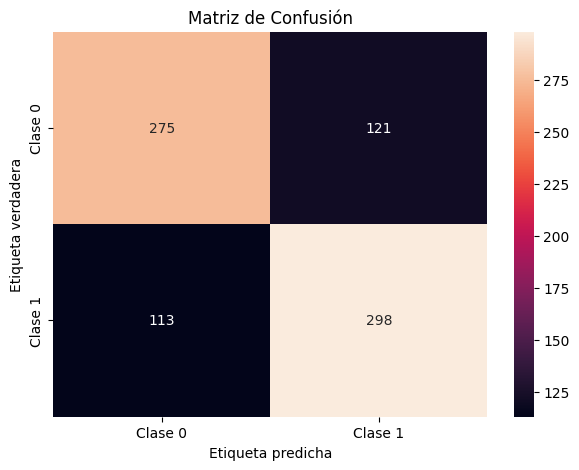

Accuracy: 0.7100371747211895
Precision (macro): 0.7099900351844106
Recall (macro): 0.7097526358475263
F1 Score (macro): 0.7098014507007623


In [29]:

#Matriz de confusion
c = confusion_matrix(y_test,decision_tree_pred ) #les paso los reales, y los predichos


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()
print(f"Accuracy: {accuracy_score(y_test, decision_tree_pred)}")
print(f"Precision (macro): {precision_score(y_test, decision_tree_pred, average='macro')}")
print(f"Recall (macro): {recall_score(y_test,decision_tree_pred, average='macro')}")
print(f"F1 Score (macro): {f1_score(y_test, decision_tree_pred, average='macro')}")

##Validaciones

Validación Cruzada k-fold

In [30]:
# Definir la configuración de K-Fold
cv = KFold(n_splits=5, shuffle=True, random_state=48)

# Realizar la validación cruzada
scores = cross_val_score(decision_tree, X, y, cv=cv)

# Imprimir los resultados
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.70049505 0.64851485 0.65756824 0.63771712 0.70719603]
Media de los scores: 0.6702982581136526
Desviación estándar de los scores: 0.02818294673140863


#Bayes (Naive Bayes)



In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)


In [32]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)


GaussianNB()

In [33]:
naive_bayes_pred = naive_bayes.predict(X_test)

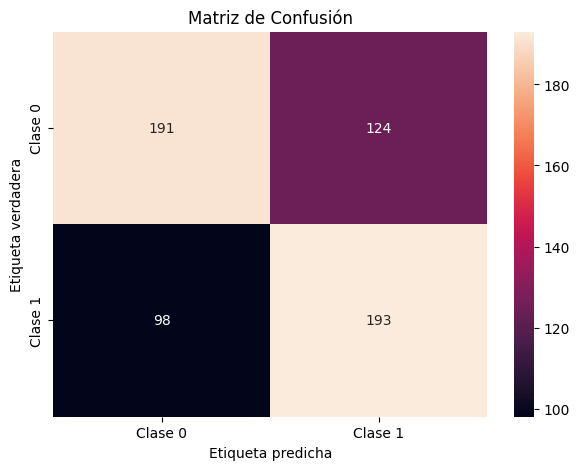

Accuracy: 0.6336633663366337
Precision (macro): 0.6348662307751083
Recall (macro): 0.6347897234495172
F1 Score (macro): 0.6336593760892297


In [34]:
#Matriz de confusion
c = confusion_matrix(y_test, naive_bayes_pred) #les paso los reales, y los predichos


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()
print(f"Accuracy: {accuracy_score(y_test, naive_bayes_pred)}")
print(f"Precision (macro): {precision_score(y_test, naive_bayes_pred, average='macro')}")
print(f"Recall (macro): {recall_score(y_test,naive_bayes_pred, average='macro')}")
print(f"F1 Score (macro): {f1_score(y_test, naive_bayes_pred, average='macro')}")

In [35]:
# Definir la configuración de K-Fold
cv = KFold(n_splits=8, shuffle=True, random_state=48)

# Realizar la validación cruzada
scores = cross_val_score(decision_tree, X, y, cv=cv)

# Imprimir los resultados
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.6798419  0.63095238 0.67460317 0.67063492 0.68650794 0.6547619
 0.68650794 0.68253968]
Media de los scores: 0.6707937292176422
Desviación estándar de los scores: 0.0179325085622827


#SVM

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split

def plot_decision_boundary(clf, X, y, ax, title):

    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    ax.set_title(title)

Separamos los datos de entrenamiento y de prediccion para el modelo SVM
* Vemos con el kernel de tipo rbf mejora sobre el kernel linear

In [37]:
X, y = X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


kernels = ['linear', 'rbf']

for kernel in kernels:

    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))


Accuracy using linear: 0.6014851485148515
Accuracy using rbf: 0.698019801980198


usamos dos variables del csv:

In [39]:
X = canciones[[ 'energy', 'danceability']].to_numpy()

Kernel: linear C: 0.1 Gamma: 0.1
Kernel: linear C: 0.1 Gamma: 1
Kernel: linear C: 0.1 Gamma: 10
Kernel: rbf C: 0.1 Gamma: 0.1
Kernel: rbf C: 0.1 Gamma: 1
Kernel: rbf C: 0.1 Gamma: 10
Kernel: linear C: 1 Gamma: 0.1
Kernel: linear C: 1 Gamma: 1
Kernel: linear C: 1 Gamma: 10
Kernel: rbf C: 1 Gamma: 0.1
Kernel: rbf C: 1 Gamma: 1
Kernel: rbf C: 1 Gamma: 10
Kernel: linear C: 10 Gamma: 0.1
Kernel: linear C: 10 Gamma: 1
Kernel: linear C: 10 Gamma: 10
Kernel: rbf C: 10 Gamma: 0.1
Kernel: rbf C: 10 Gamma: 1
Kernel: rbf C: 10 Gamma: 10


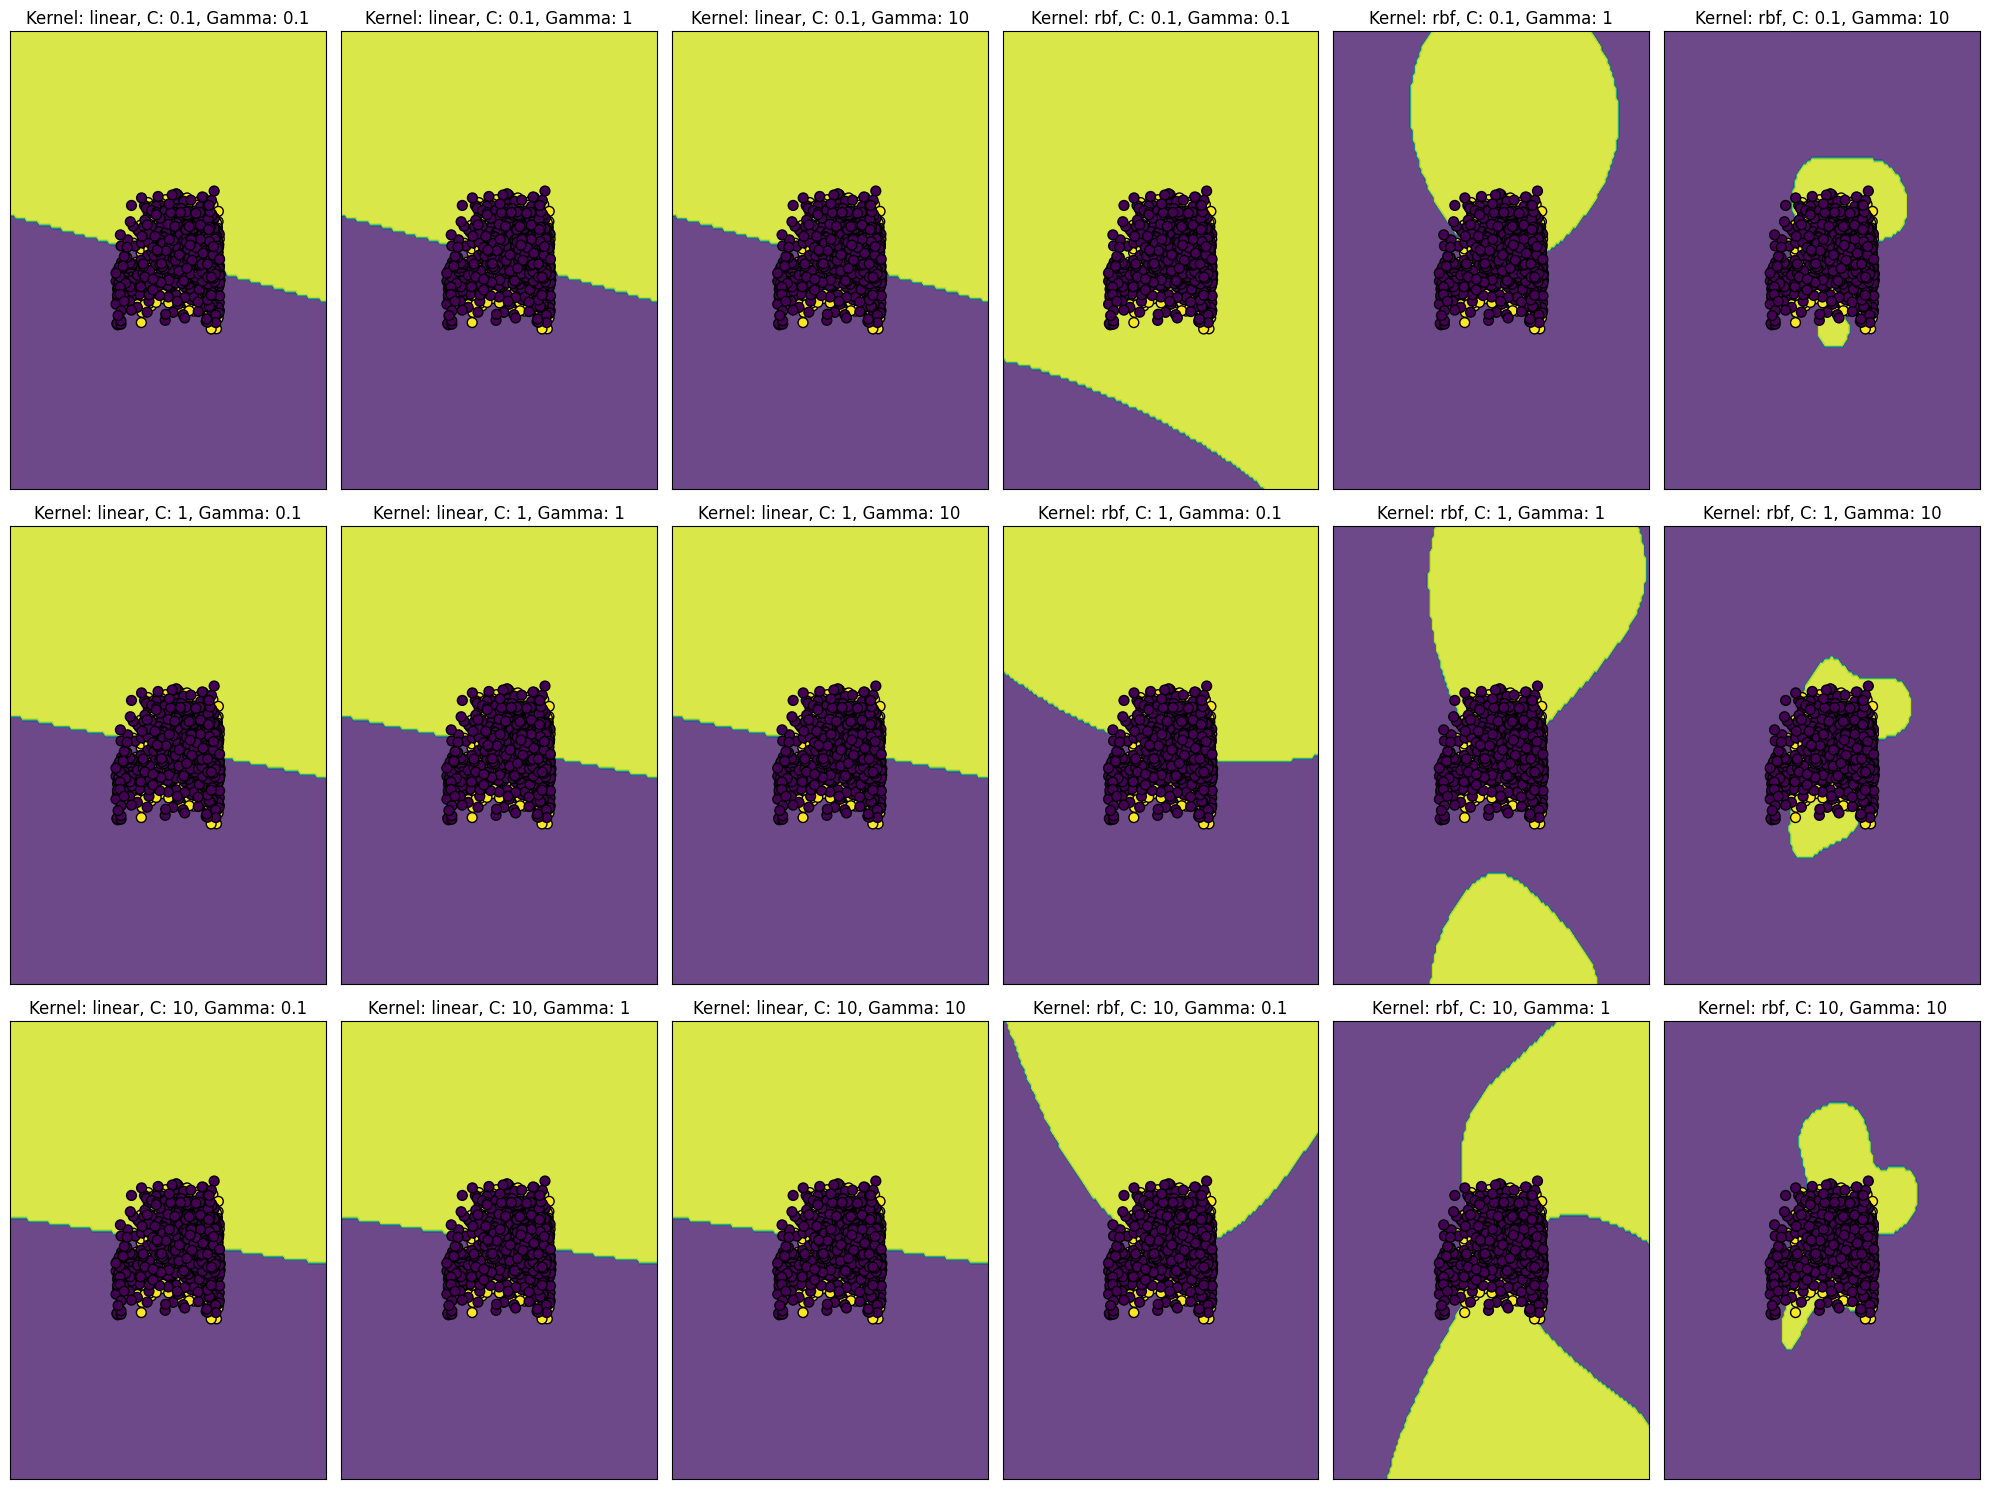

In [40]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



X, y = X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


kernels = ['linear', 'rbf']
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]


fig, axes = plt.subplots(nrows=len(C_values), ncols=len(gamma_values) * len(kernels), figsize=(20,15))

for i, C_val in enumerate(C_values):
    for k, kernel in enumerate(kernels):
        for j, gamma_val in enumerate(gamma_values):

            model = SVC(kernel=kernel, C=C_val, gamma=gamma_val)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)

            print("Kernel:", kernel, "C:", C_val, "Gamma:", gamma_val)


            col_index = j + k * len(gamma_values)
            title = ('Kernel: {}, C: {}, Gamma: {}'.format(kernel, C_val, gamma_val))
            plot_decision_boundary(model, X, y, axes[i, col_index], title)
            axes[i, col_index].set_xticks(())
            axes[i, col_index].set_yticks(())

plt.tight_layout()
plt.show()

###Grid Search

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Cargar un conjunto de datos (en este caso, el conjunto de datos Iris como ejemplo)

X = X
y = y

# Definir los hiperparámetros y sus posibles valores en un diccionario
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Crear un objeto SVM
svm = SVC()

# Crear un objeto GridSearchCV para la búsqueda en la cuadrícula
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en la cuadrícula
grid_search.fit(X, y)

# Mostrar los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Mostrar el mejor puntaje de validación cruzada
best_score = grid_search.best_score_
print("Mejor puntaje de validación cruzada:", best_score)


Mejores hiperparámetros: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Mejor puntaje de validación cruzada: 0.5681890769722134


Matriz de Confusion

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       206
           1       0.59      0.64      0.61       198

    accuracy                           0.61       404
   macro avg       0.61      0.61      0.61       404
weighted avg       0.61      0.61      0.61       404



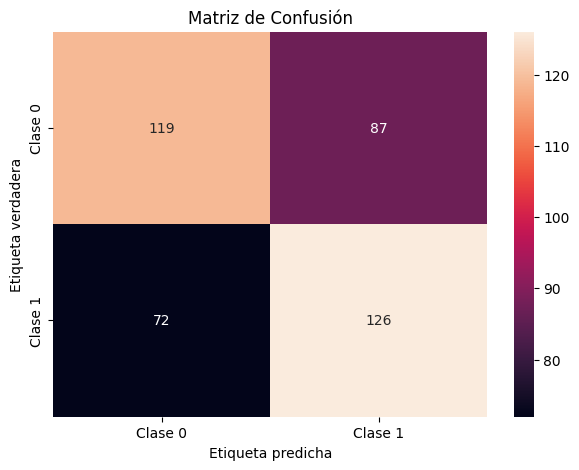

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


svc_best = SVC(C=1, gamma=1, kernel='rbf')
svc_best.fit(X_train, y_train)


y_pred = svc_best.predict(X_test)


print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


c = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()


Validacion Cruzada k-fold

In [52]:

X = X
y = y

# Cree un clasificador SVM
svm_classifier = SVC(kernel='rbf')  # Puede ajustar el kernel según sus necesidades

# Realice la validación cruzada k-fold
k = 5  # Número de pliegues
scores = cross_val_score(svm_classifier, X, y, cv=k)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.67079208 0.64356436 0.50620347 0.64516129 0.6898263 ]
Media de los scores: 0.6311095005282166
Desviación estándar de los scores: 0.06477107629215928


#Ensamble

Realizamos el ensamble con los modelos SVM, Knn, Arbol de Decision y Bayes

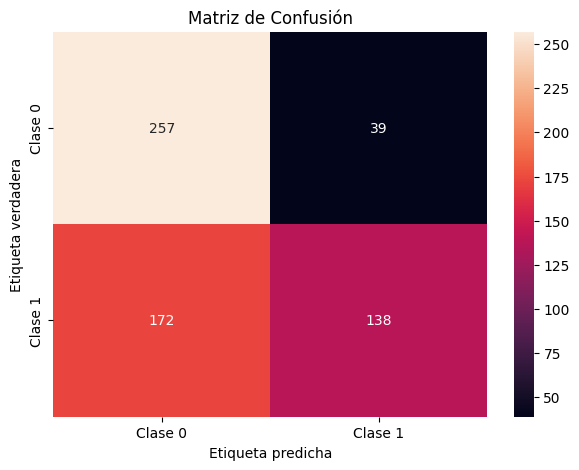

In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


X = canciones[['acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness', 'valence']].to_numpy()
y = y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(X_train, y_train)

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


knn_predictions = knn.predict(X_test)
svm_predictions = svm.predict(X_test)
naive_bayes_predictions = naive_bayes.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)

# ENSABLE
final_predictions = []
for k, s, n, dt in zip(knn_predictions, svm_predictions, naive_bayes_predictions, decision_tree_predictions):


    votes = {0: 0, 1: 0, 2: 0}
    votes[k] += 1
    votes[s] += 1
    votes[n] += 1
    votes[dt] += 1


    majority_vote = max(votes, key=votes.get)
    final_predictions.append(majority_vote)

c = confusion_matrix(y_test, final_predictions)

plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()